In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import metrics

## Data Exploratioon

In [114]:
train_df = pd.read_csv('../data/train.csv', delimiter=",")
new_df = pd.read_csv('../data/test.csv', delimiter=",")
new_df = new_df.iloc[:,1:]
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [16]:
train_df.shape

(2000, 21)

In [17]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## Jumlah Missing Value

In [19]:
train_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [20]:
(train_df.isnull().sum() / train_df.shape[0] * 100.00)

battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64

## Data Visualization

In [21]:
plt.style.use('fivethirtyeight')

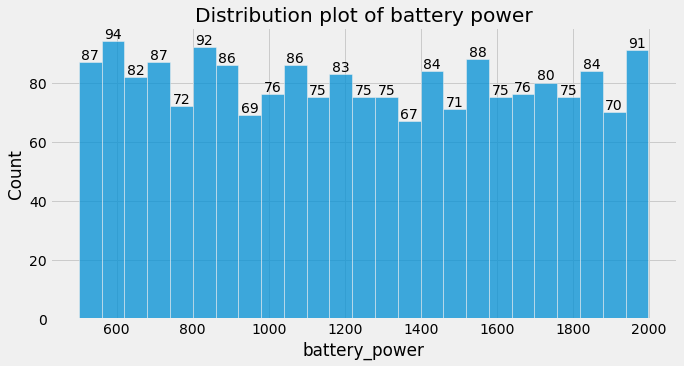

In [23]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(train_df['battery_power'] , bins = 25)
g.bar_label(g.containers[1])
plt.title('Distribution plot of battery power')
plt.show()

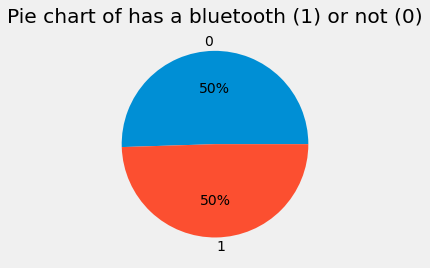

In [26]:
plt.pie(train_df['blue'].value_counts(), labels=train_df['blue'].unique(), autopct='%.0f%%')
plt.title('Pie chart of has a bluetooth (1) or not (0)')
plt.show()

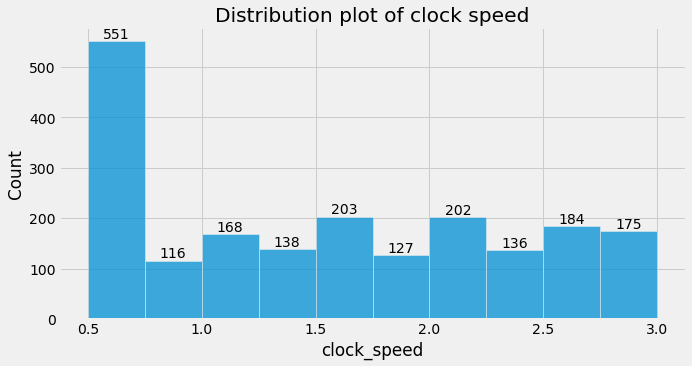

In [28]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(train_df['clock_speed'] , bins = 10)
g.bar_label(g.containers[1])
plt.title('Distribution plot of clock speed')
plt.show()

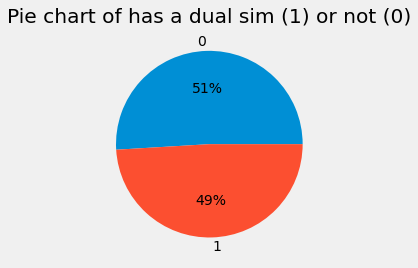

In [29]:
plt.pie(train_df['dual_sim'].value_counts(), labels=train_df['dual_sim'].unique(), autopct='%.0f%%')
plt.title('Pie chart of has a dual sim (1) or not (0)')
plt.show()

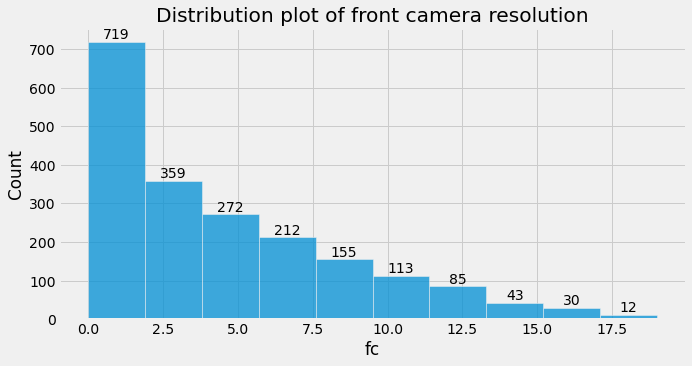

In [30]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(train_df['fc'] , bins = 10)
g.bar_label(g.containers[1])
plt.title('Distribution plot of front camera resolution')
plt.show()

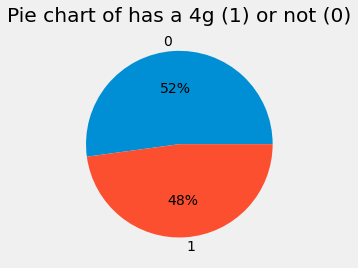

In [31]:
plt.pie(train_df['four_g'].value_counts(), labels=train_df['four_g'].unique(), autopct='%.0f%%')
plt.title('Pie chart of has a 4g (1) or not (0)')
plt.show()

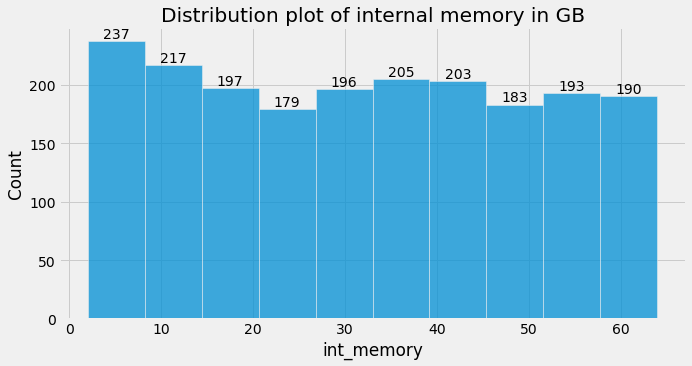

In [32]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(train_df['int_memory'] , bins = 10)
g.bar_label(g.containers[1])
plt.title('Distribution plot of internal memory in GB')
plt.show()

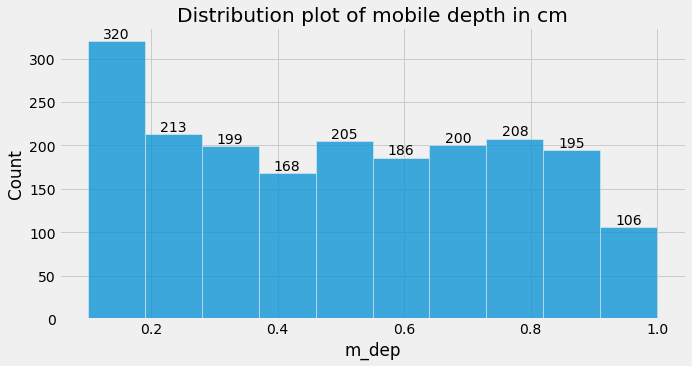

In [33]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(train_df['m_dep'] , bins = 10)
g.bar_label(g.containers[1])
plt.title('Distribution plot of mobile depth in cm')
plt.show()

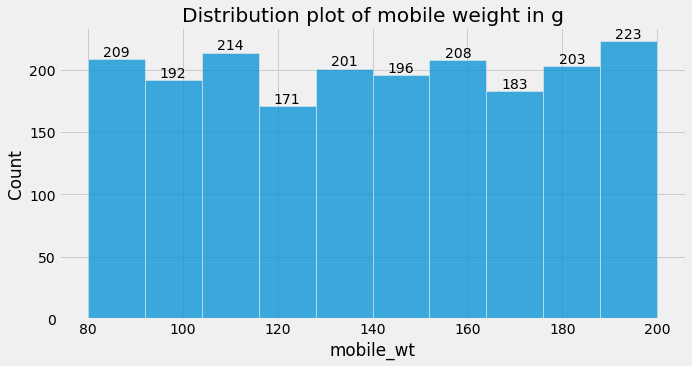

In [34]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(train_df['mobile_wt'] , bins = 10)
g.bar_label(g.containers[1])
plt.title('Distribution plot of mobile weight in g')
plt.show()

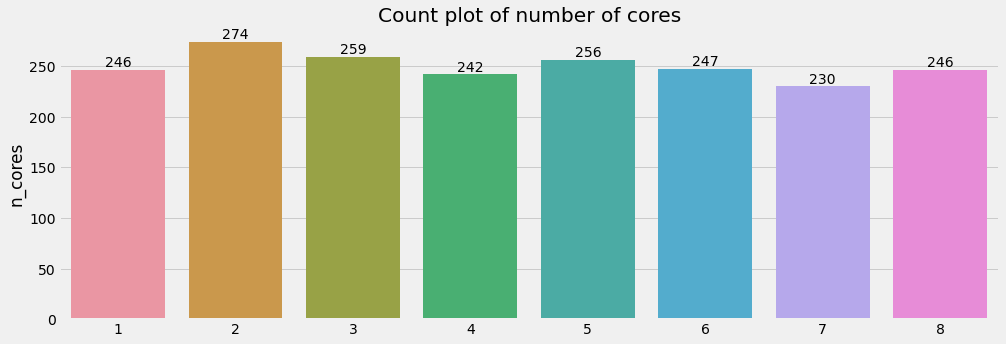

In [37]:
plt.figure(1 , figsize = (15 , 5))
g = sns.barplot(y=train_df['n_cores'].value_counts(), x=train_df['n_cores'].unique())
g.bar_label(g.containers[0])
plt.title('Count plot of number of cores')
plt.show()

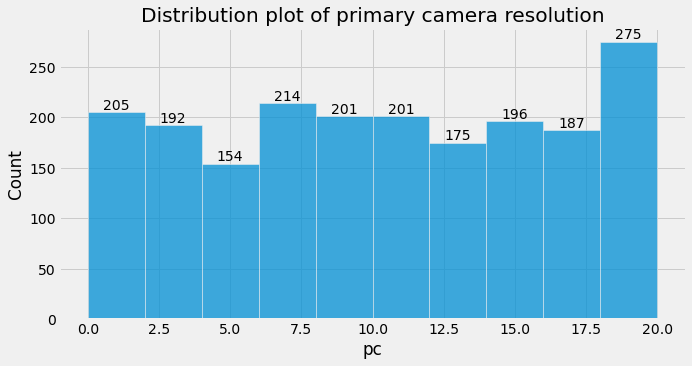

In [38]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(train_df['pc'] , bins = 10)
g.bar_label(g.containers[1])
plt.title('Distribution plot of primary camera resolution')
plt.show()

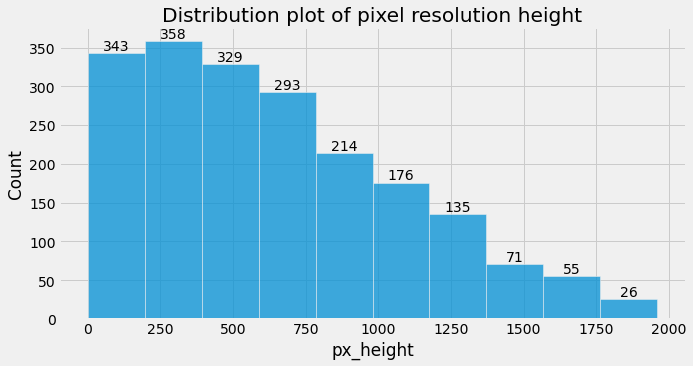

In [39]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(train_df['px_height'] , bins = 10)
g.bar_label(g.containers[1])
plt.title('Distribution plot of pixel resolution height')
plt.show()

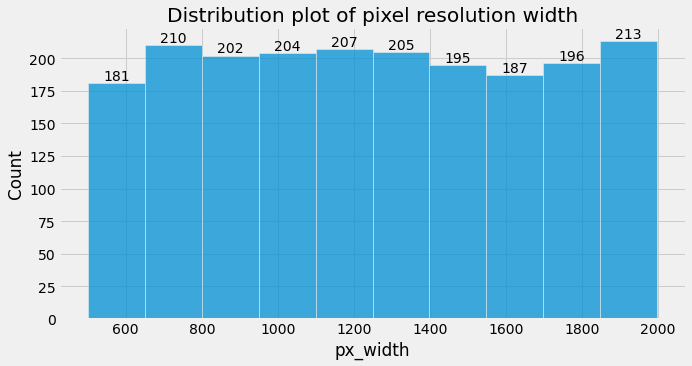

In [40]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(train_df['px_width'] , bins = 10)
g.bar_label(g.containers[1])
plt.title('Distribution plot of pixel resolution width')
plt.show()

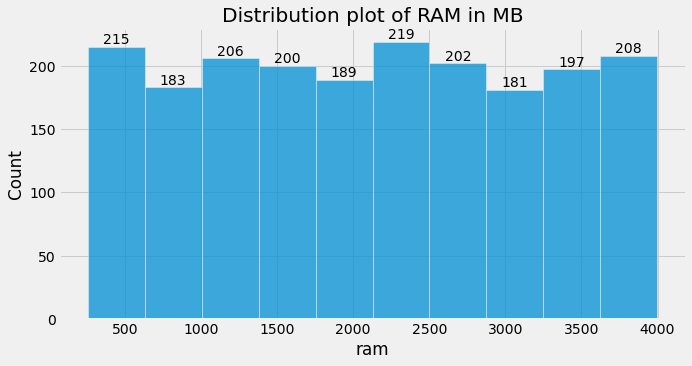

In [41]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(train_df['ram'] , bins = 10)
g.bar_label(g.containers[1])
plt.title('Distribution plot of RAM in MB')
plt.show()

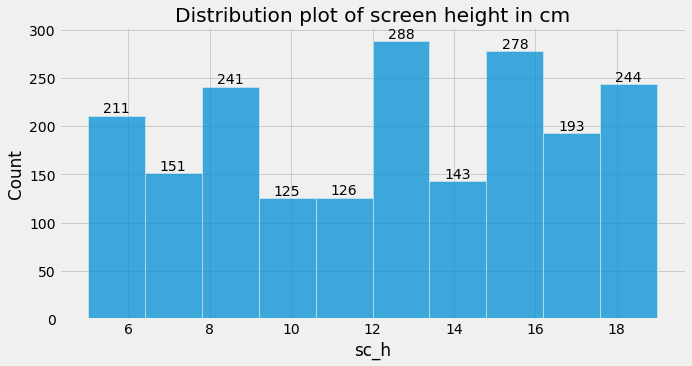

In [42]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(train_df['sc_h'] , bins = 10)
g.bar_label(g.containers[1])
plt.title('Distribution plot of screen height in cm')
plt.show()

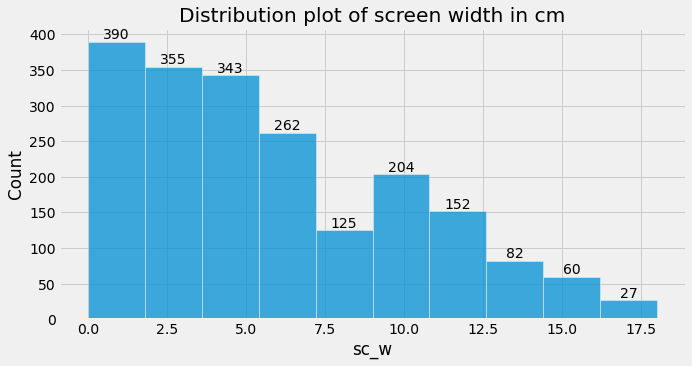

In [43]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(train_df['sc_w'] , bins = 10)
g.bar_label(g.containers[1])
plt.title('Distribution plot of screen width in cm')
plt.show()

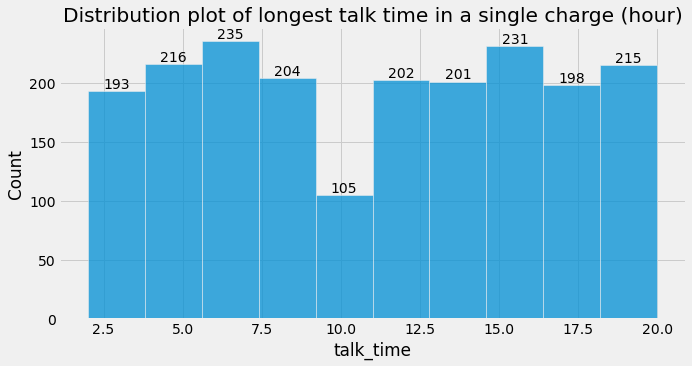

In [46]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(train_df['talk_time'] , bins = 10)
g.bar_label(g.containers[1])
plt.title('Distribution plot of longest talk time in a single charge (hour)')
plt.show()

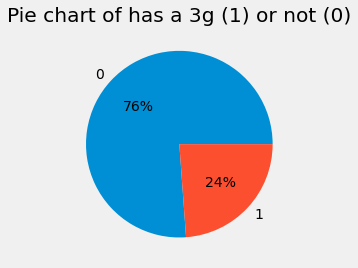

In [47]:
plt.pie(train_df['three_g'].value_counts(), labels=train_df['three_g'].unique(), autopct='%.0f%%')
plt.title('Pie chart of has a 3g (1) or not (0)')
plt.show()

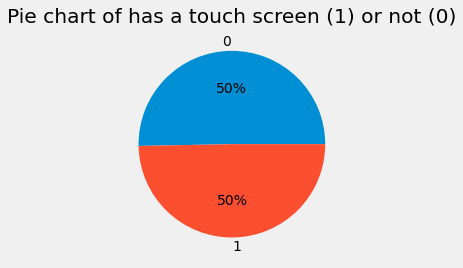

In [48]:
plt.pie(train_df['touch_screen'].value_counts(), labels=train_df['touch_screen'].unique(), autopct='%.0f%%')
plt.title('Pie chart of has a touch screen (1) or not (0)')
plt.show()

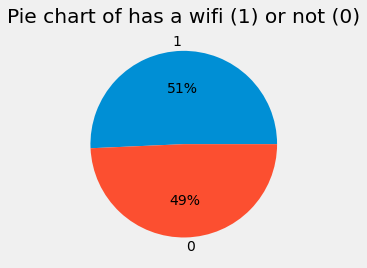

In [49]:
plt.pie(train_df['wifi'].value_counts(), labels=train_df['wifi'].unique(), autopct='%.0f%%')
plt.title('Pie chart of has a wifi (1) or not (0)')
plt.show()

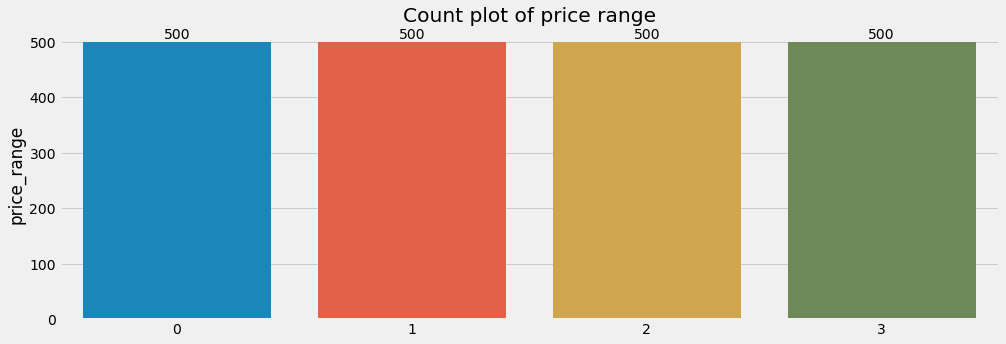

In [61]:
plt.figure(1 , figsize = (15 , 5))
g = sns.barplot(y=train_df['price_range'].value_counts(), x=train_df['price_range'].unique())
g.bar_label(g.containers[0])
plt.title('Count plot of price range')
plt.show()

In [51]:
X = train_df.iloc[:,:-1]
Y = train_df['price_range']

In [52]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [53]:
Y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [56]:
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.1, random_state=8)

In [57]:
X_trainset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
238,1330,0,0.5,0,0,0,38,1.0,183,7,1,1290,1441,1733,9,0,11,1,0,1
475,1122,0,1.2,0,9,0,2,0.6,120,4,14,331,790,3291,11,2,13,1,1,1
1100,741,0,1.5,0,1,0,14,0.3,178,5,13,334,594,1886,19,11,9,1,1,1
1768,719,1,0.5,1,0,1,23,0.4,113,6,9,431,1727,3990,14,9,12,1,1,1
1072,1342,0,1.0,0,0,1,31,0.6,86,7,1,991,1638,2746,15,5,10,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,1713,0,3.0,1,5,1,20,0.9,104,7,17,237,890,971,11,10,10,1,0,0
133,668,0,2.9,1,7,0,30,0.2,195,8,12,522,1056,2399,10,5,7,1,1,1
361,899,0,0.5,1,13,1,57,0.9,172,2,18,788,1331,364,11,1,7,1,1,0
1364,1012,0,0.5,1,4,0,39,0.1,161,4,6,882,1195,2802,8,0,10,1,1,0


In [58]:
X_testset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1859,649,1,1.4,0,4,1,19,0.8,190,7,12,344,1551,739,18,1,2,1,1,0
1059,1925,0,3.0,1,0,1,16,0.8,175,8,11,983,1087,2173,7,3,19,1,1,0
114,1804,0,0.5,0,9,1,22,0.6,153,7,19,1158,1244,3472,9,1,20,1,0,1
791,1520,0,0.5,0,1,1,24,0.7,199,5,8,109,1909,3233,13,3,4,1,0,1
1813,1052,0,0.9,0,1,0,6,0.8,195,4,16,1191,1839,552,6,1,11,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,645,0,1.2,0,6,1,41,0.7,184,8,17,741,1130,714,18,2,13,1,1,0
1806,628,1,1.8,0,5,0,60,0.2,87,6,6,1047,1534,1337,12,7,14,0,1,0
1590,1640,0,0.5,1,1,1,36,0.9,87,8,11,664,1806,3235,6,1,10,1,0,1
1057,980,1,0.5,0,0,1,33,0.9,160,6,0,1008,1758,2268,7,5,4,1,1,0


In [59]:
Y_trainset

238     1
475     2
1100    0
1768    3
1072    3
       ..
986     0
133     1
361     0
1364    2
451     1
Name: price_range, Length: 1800, dtype: int64

In [60]:
Y_testset

1859    0
1059    2
114     3
791     3
1813    0
       ..
313     0
1806    1
1590    3
1057    2
1713    0
Name: price_range, Length: 200, dtype: int64

## Decision Tree Using Entropy

In [95]:
entropyMobileTree = DecisionTreeClassifier(criterion="entropy", max_depth = 18)
entropyMobileTree

DecisionTreeClassifier(criterion='entropy', max_depth=18)

In [96]:
entropyMobileTree.fit(X_trainset, Y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=18)

In [97]:
predMobileTree = entropyMobileTree.predict(X_testset)

In [98]:
predMobileTree

array([0, 2, 3, 3, 0, 2, 0, 0, 2, 3, 3, 2, 3, 1, 0, 0, 0, 3, 3, 1, 2, 1,
       2, 2, 0, 0, 3, 1, 1, 3, 1, 3, 1, 1, 0, 0, 0, 3, 1, 1, 3, 3, 1, 2,
       2, 3, 3, 0, 2, 0, 0, 3, 0, 3, 1, 0, 3, 2, 0, 1, 1, 0, 0, 2, 1, 1,
       2, 1, 2, 3, 1, 1, 2, 3, 1, 3, 0, 1, 2, 1, 3, 1, 2, 1, 2, 2, 1, 2,
       0, 0, 0, 0, 0, 0, 2, 3, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 2, 3, 2,
       2, 3, 3, 1, 0, 3, 3, 0, 2, 3, 1, 0, 1, 2, 3, 0, 2, 0, 2, 2, 1, 0,
       0, 1, 0, 1, 3, 3, 0, 1, 0, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 3, 2,
       1, 3, 0, 2, 0, 0, 3, 1, 3, 2, 0, 0, 0, 3, 0, 1, 3, 3, 3, 2, 1, 2,
       0, 0, 3, 2, 1, 0, 1, 2, 3, 2, 1, 3, 2, 0, 1, 2, 3, 0, 2, 0, 1, 3,
       2, 0], dtype=int64)

In [99]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_testset, predMobileTree))

DecisionTrees's Accuracy:  0.86


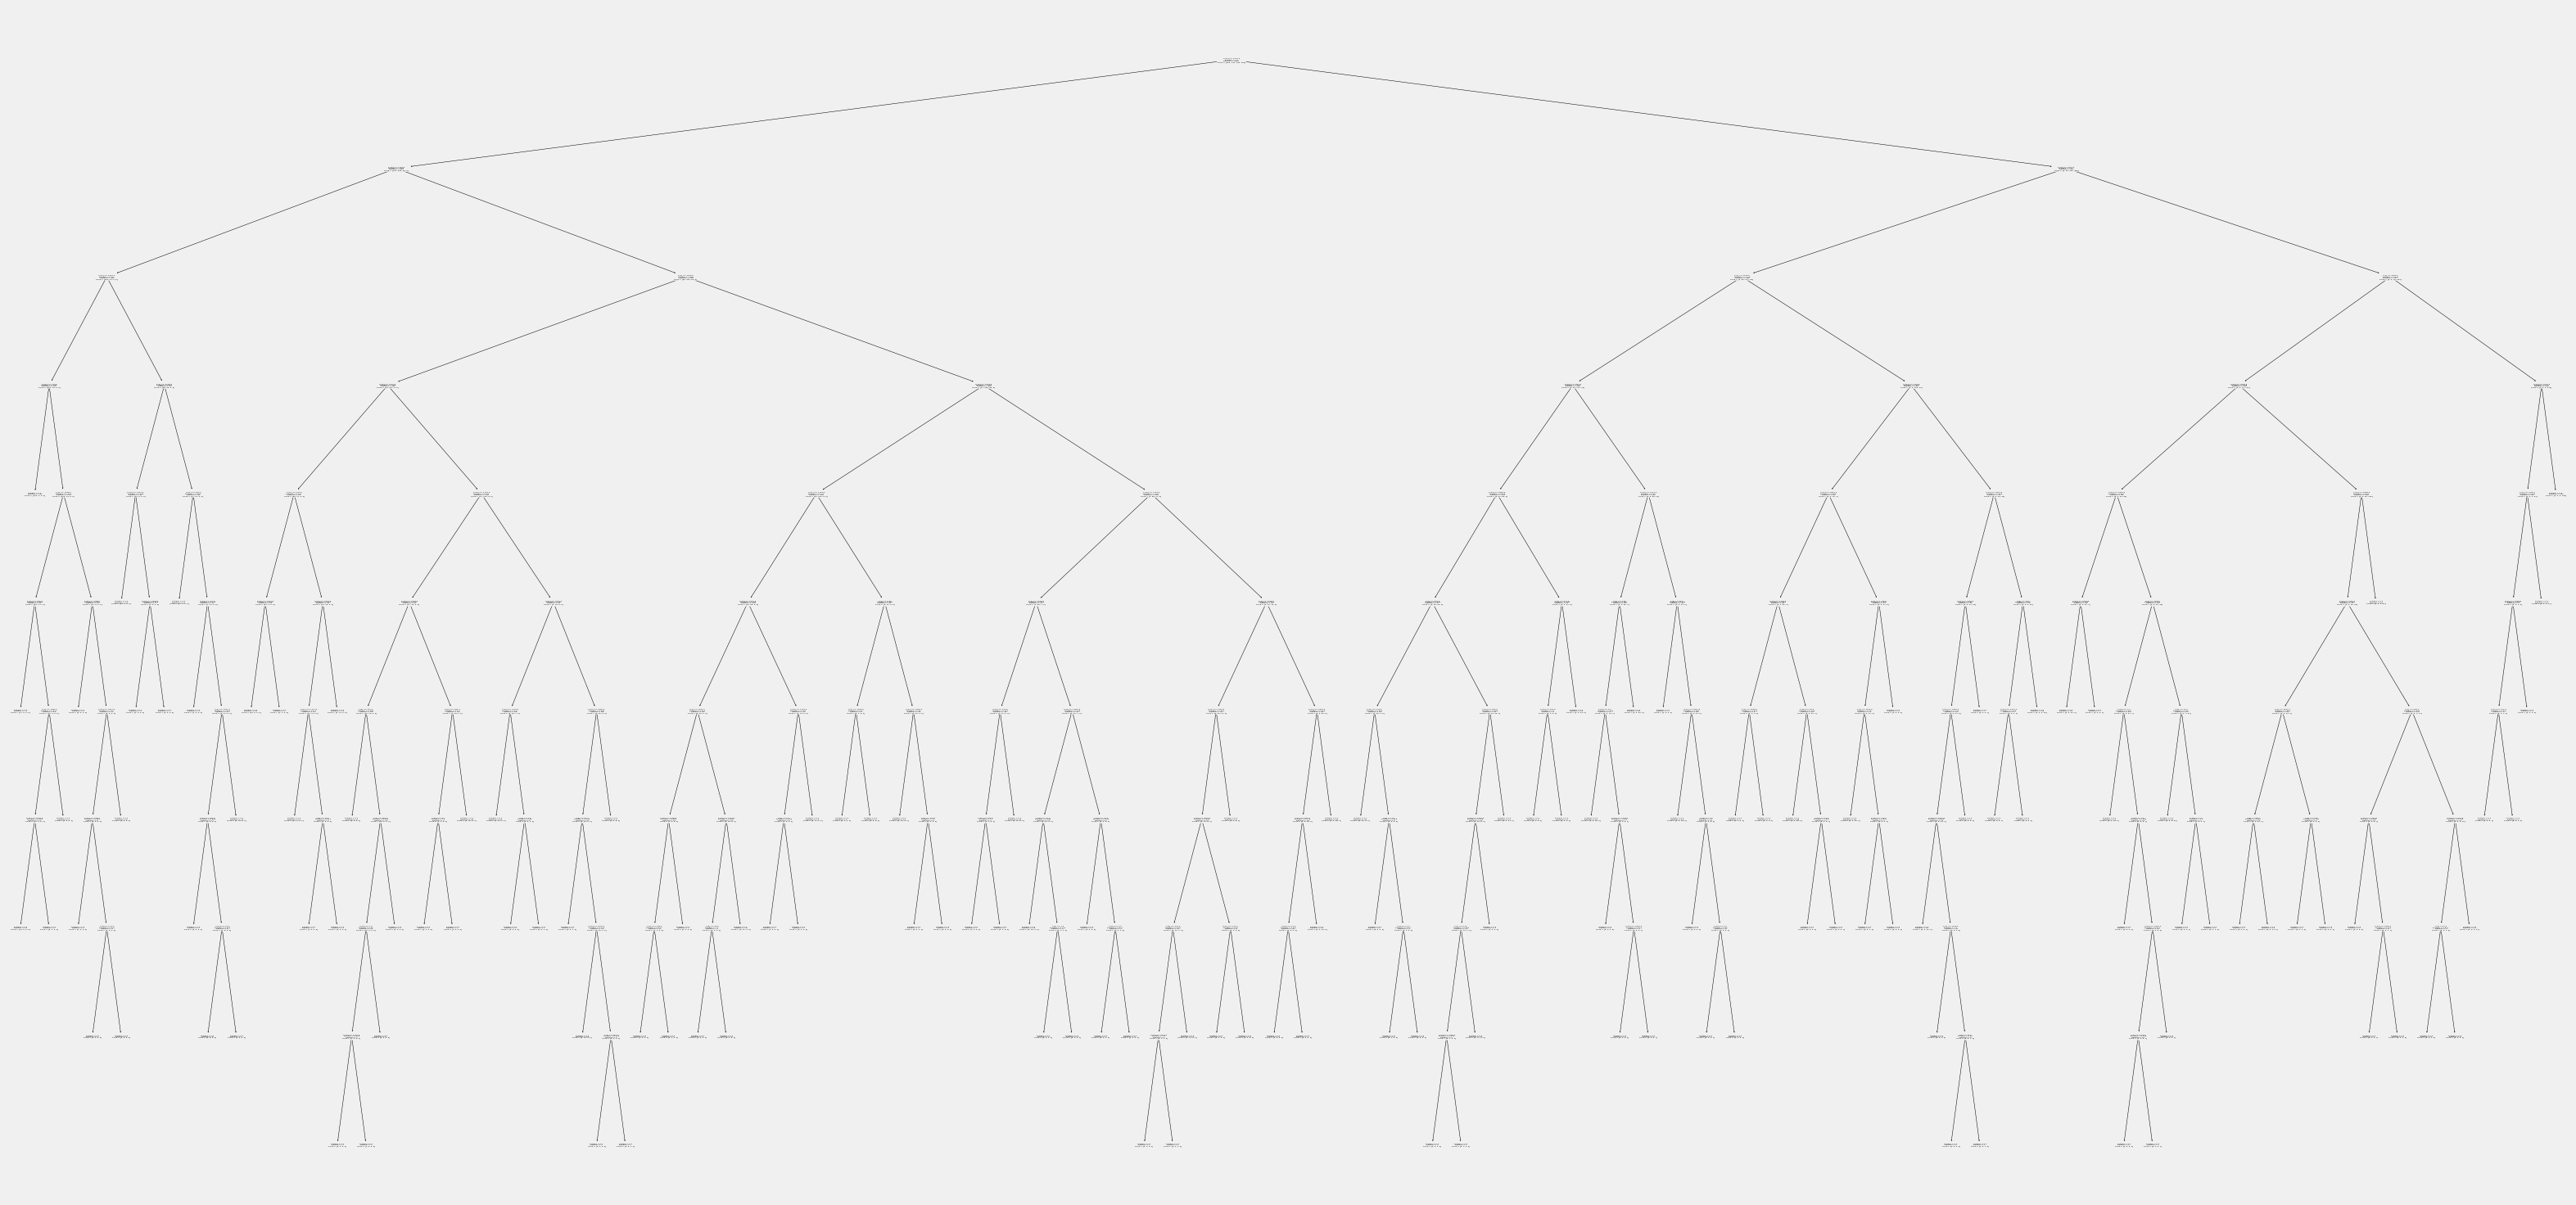

In [100]:
plt.figure(1 , figsize = (50 , 25))
tree.plot_tree(entropyMobileTree)
plt.show()

## Decision Tree Using Gini

In [101]:
giniMobileTree = DecisionTreeClassifier(criterion="gini", max_depth = 18)
giniMobileTree

DecisionTreeClassifier(max_depth=18)

In [102]:
giniMobileTree.fit(X_trainset, Y_trainset)

DecisionTreeClassifier(max_depth=18)

In [103]:
predMobileTree = giniMobileTree.predict(X_testset)

In [104]:
predMobileTree

array([0, 2, 3, 3, 0, 2, 0, 0, 2, 3, 3, 2, 3, 1, 0, 0, 0, 3, 3, 1, 2, 1,
       2, 1, 0, 0, 2, 1, 1, 3, 2, 2, 1, 1, 1, 0, 0, 2, 1, 1, 3, 3, 1, 2,
       2, 3, 3, 0, 2, 0, 0, 2, 0, 3, 1, 0, 3, 2, 0, 1, 1, 0, 0, 3, 1, 1,
       2, 0, 1, 3, 1, 1, 3, 3, 1, 3, 0, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2,
       0, 1, 0, 0, 0, 0, 2, 3, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 3, 3, 2,
       2, 3, 3, 1, 0, 3, 3, 1, 2, 3, 1, 0, 1, 3, 3, 0, 2, 1, 3, 1, 1, 0,
       0, 1, 0, 0, 3, 3, 0, 1, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2,
       1, 3, 0, 2, 0, 0, 2, 1, 3, 2, 0, 0, 0, 3, 0, 1, 3, 3, 3, 2, 1, 2,
       0, 0, 3, 2, 1, 0, 1, 1, 2, 2, 1, 3, 2, 0, 1, 3, 2, 0, 2, 0, 1, 3,
       2, 1], dtype=int64)

In [105]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_testset, predMobileTree))

DecisionTrees's Accuracy:  0.825


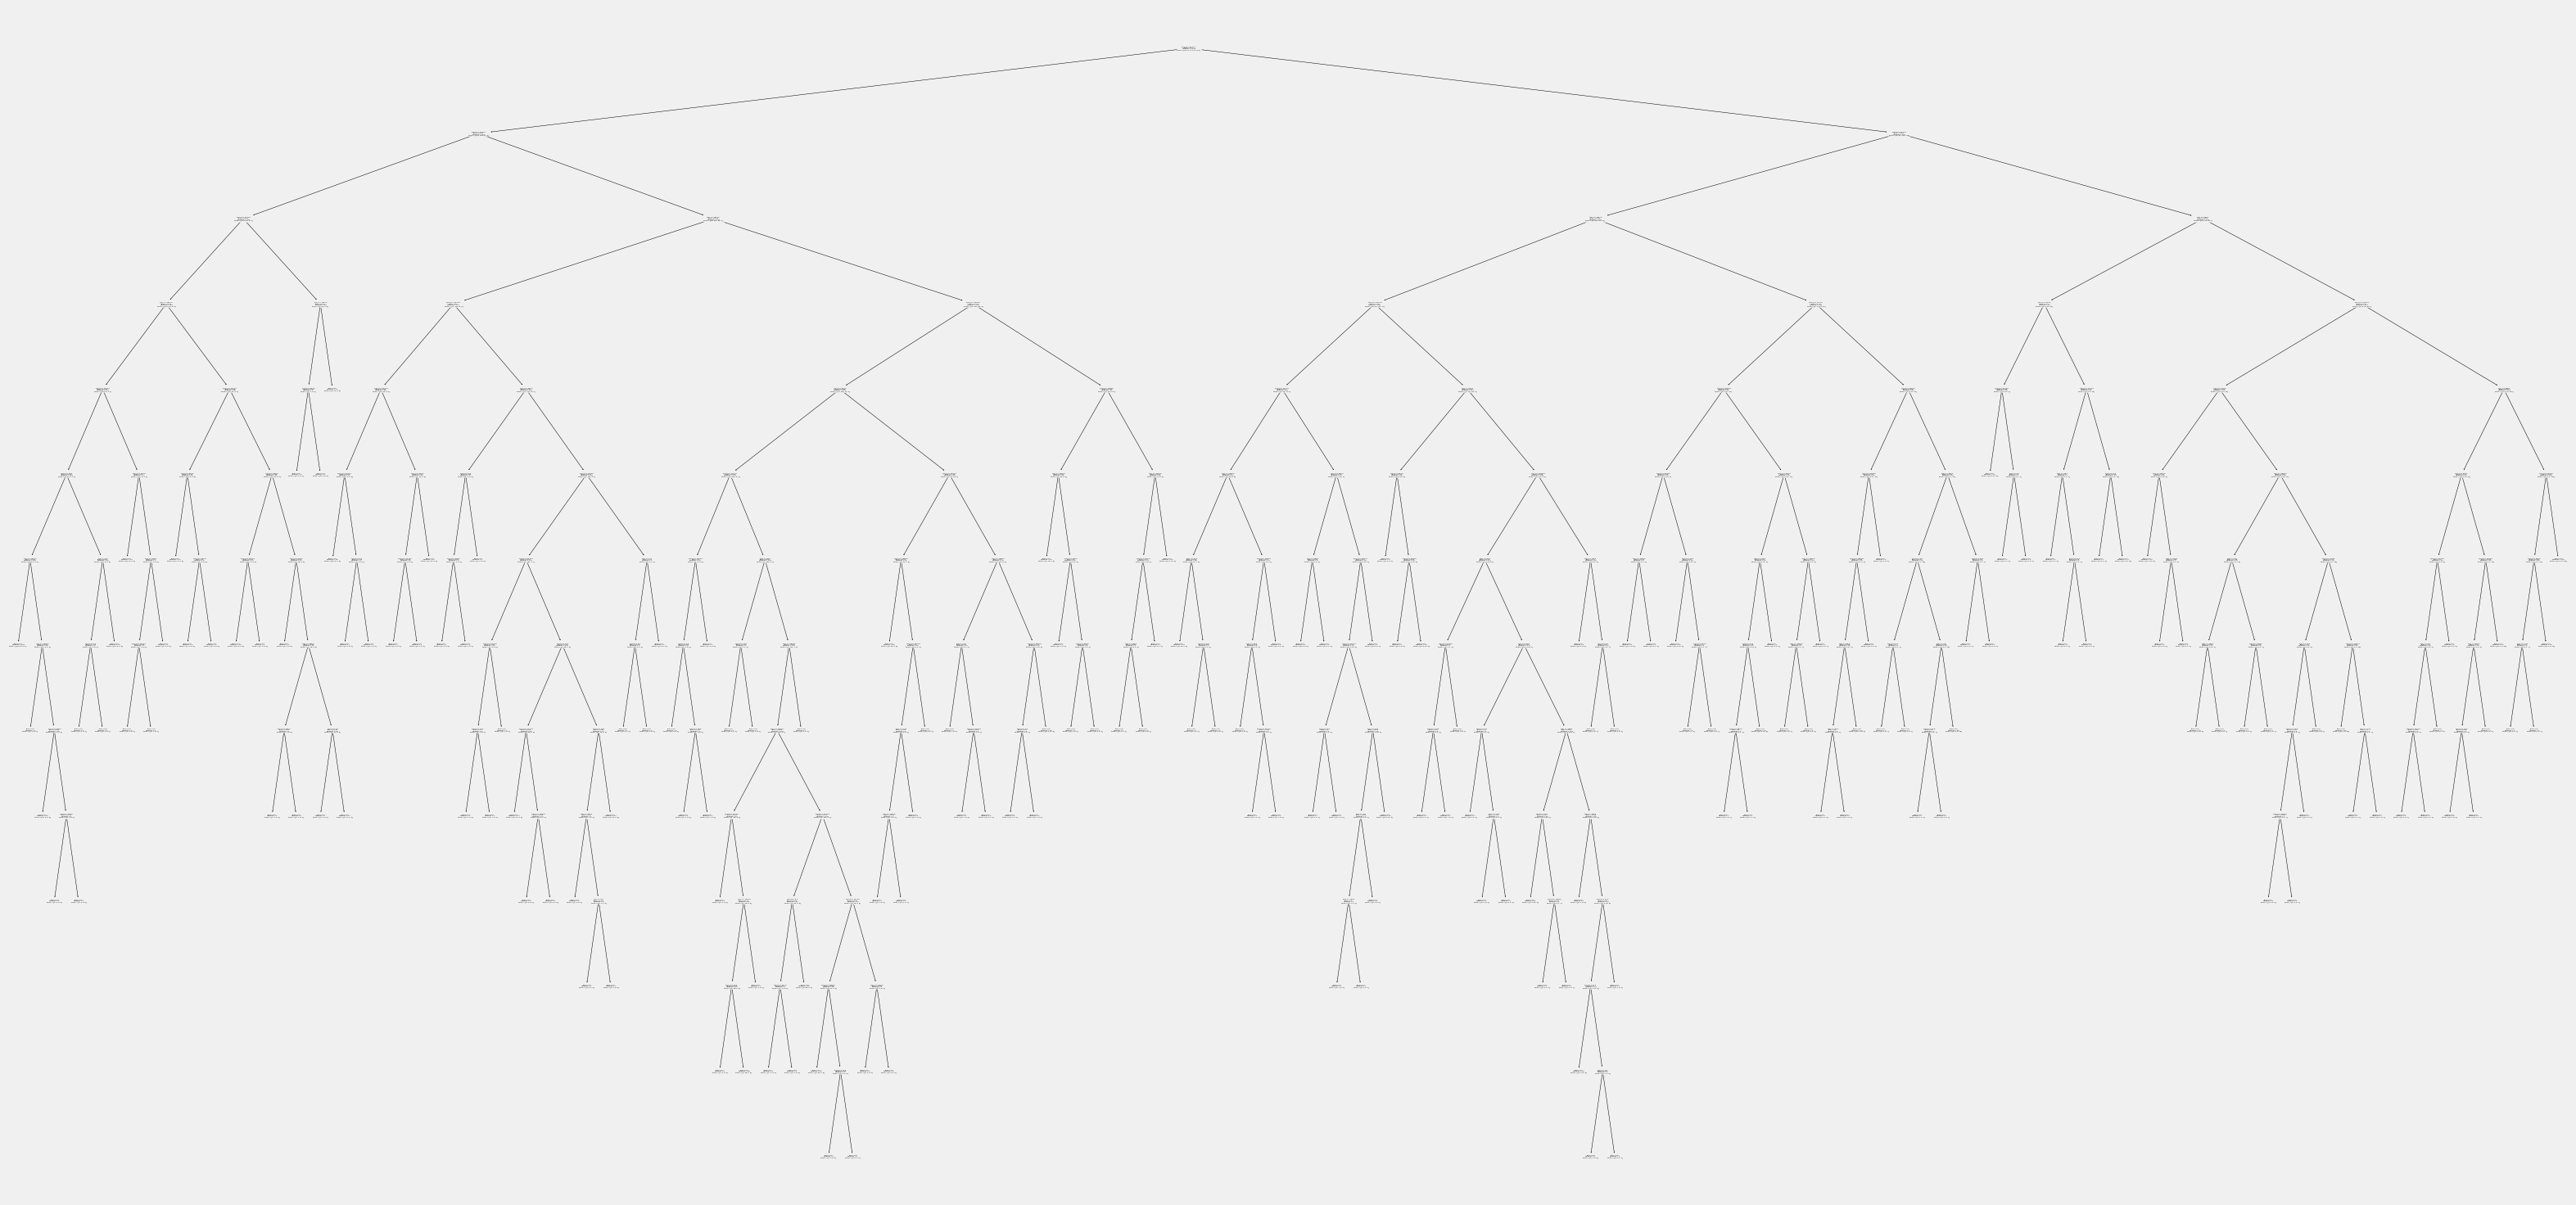

In [106]:
plt.figure(1 , figsize = (50 , 25))
tree.plot_tree(giniMobileTree)
plt.show()

## Decision Tree Using Log Loss

In [107]:
logLossMobileTree = DecisionTreeClassifier(criterion="log_loss", max_depth = 18)
logLossMobileTree

DecisionTreeClassifier(criterion='log_loss', max_depth=18)

In [108]:
logLossMobileTree.fit(X_trainset, Y_trainset)

DecisionTreeClassifier(criterion='log_loss', max_depth=18)

In [109]:
predMobileTree = logLossMobileTree.predict(X_testset)

In [110]:
predMobileTree

array([0, 2, 3, 3, 0, 2, 0, 0, 2, 3, 3, 2, 3, 1, 0, 0, 0, 3, 2, 1, 1, 1,
       2, 2, 0, 0, 3, 1, 1, 3, 1, 3, 1, 1, 0, 0, 0, 3, 1, 1, 3, 3, 1, 2,
       2, 3, 3, 0, 1, 0, 0, 2, 0, 3, 1, 0, 3, 2, 0, 1, 1, 0, 0, 2, 2, 1,
       2, 1, 2, 3, 1, 1, 2, 3, 1, 3, 0, 1, 2, 1, 3, 1, 2, 1, 2, 2, 1, 2,
       0, 0, 0, 0, 0, 0, 2, 3, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 2, 3, 2,
       2, 3, 3, 1, 0, 3, 3, 0, 2, 3, 1, 0, 1, 3, 3, 0, 2, 0, 2, 1, 1, 0,
       0, 1, 0, 1, 3, 3, 0, 1, 0, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 3, 2,
       1, 3, 0, 2, 0, 0, 3, 1, 3, 2, 0, 0, 0, 3, 0, 1, 3, 3, 2, 2, 1, 2,
       0, 0, 3, 2, 1, 0, 1, 2, 3, 2, 1, 3, 2, 0, 1, 2, 3, 0, 2, 0, 1, 3,
       2, 0], dtype=int64)

In [111]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_testset, predMobileTree))

DecisionTrees's Accuracy:  0.845


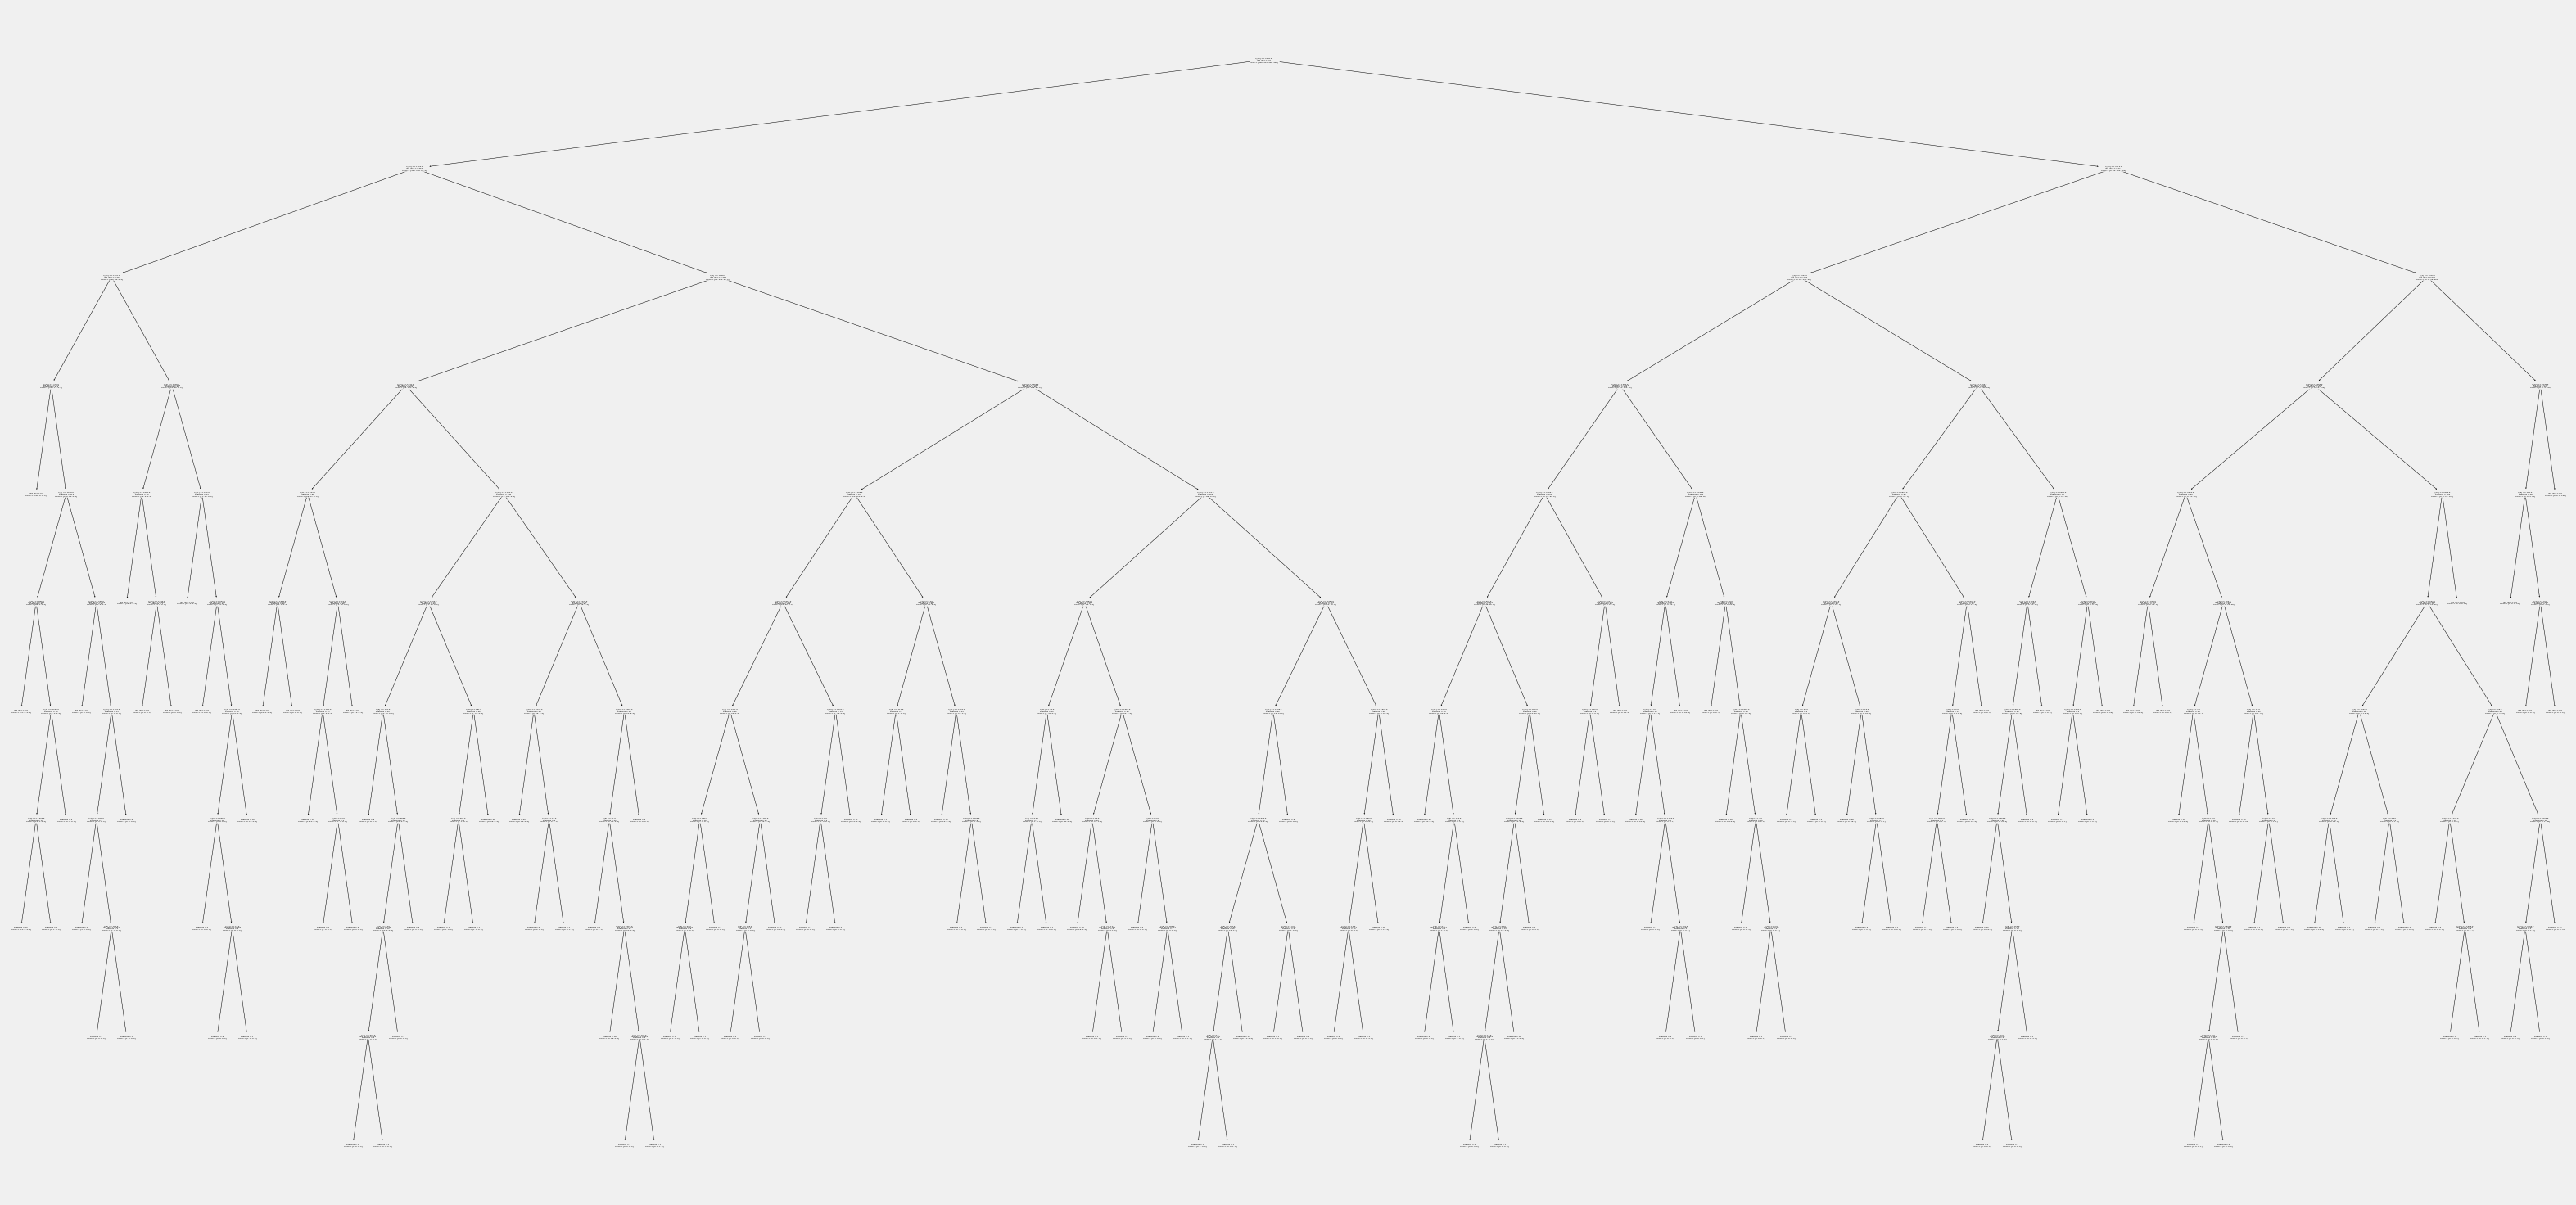

In [112]:
plt.figure(1 , figsize = (50 , 25))
tree.plot_tree(logLossMobileTree)
plt.show()

## Predict Data Test Using Decision Tree Entropy

In [116]:
predMobileEntropy = entropyMobileTree.predict(new_df)

In [117]:
predMobileEntropy

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 0, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 2, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 2, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 2, 0, 2,
       1, 0, 2, 0, 2, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 2,
       0, 0, 1, 3, 0, 0, 0, 0, 2, 3, 2, 1, 0, 0, 0, 1, 0, 3, 1, 1, 2, 2,
       2, 3, 1, 2, 3, 2, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 2, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 3, 1, 2, 0,
       0, 2, 1, 2, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 2, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 2, 1, 3, 2, 0, 3, 0, 1, 2, 1, 0, 3, 3, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 2, 0, 2, 3, 1,

## Predict Data Test Using Decision Tree Gini

In [118]:
predMobileGini = giniMobileTree.predict(new_df)

In [119]:
predMobileGini

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 0, 3, 2, 0, 2,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 2, 1, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 1, 2, 3, 1, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 0, 2, 1, 1, 2, 2, 3, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       2, 2, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 3, 3, 2, 0, 2,
       1, 1, 3, 0, 1, 0, 3, 2, 1, 2, 1, 3, 3, 3, 3, 2, 2, 3, 3, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 2, 2,
       2, 3, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 2, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 2, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 0, 2, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 1, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

## Predict Data Test Using Decision Tree Log Loss

In [120]:
predMobileLogLoss = logLossMobileTree.predict(new_df)

In [121]:
predMobileLogLoss

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 0, 3, 2, 0, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 2, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 2, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 2, 0, 2,
       1, 1, 2, 0, 2, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 2,
       1, 0, 1, 3, 0, 0, 0, 0, 2, 3, 2, 1, 0, 0, 0, 1, 0, 3, 1, 1, 2, 2,
       2, 3, 1, 2, 3, 3, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 2, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 2, 1, 3, 2, 0, 3, 0, 1, 2, 1, 0, 3, 3, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 2, 0, 2, 3, 1,